In [1]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

In [2]:
def ec_mov(x_p,t,epsilon=1): #x_p=(x,y,px,py)
    r32=(x_p[0]**2+x_p[1]**2)**(1.5) #r32 es raiz a la 3/2
    dx=x_p[2]
    dy=epsilon*x_p[3]
    dpx=-x_p[0]/r32
    dpy=-x_p[1]/r32
    return array([dx,dy,dpx,dpy])
def energia(x_p,epsilon=1):
    r=sqrt(x_p[0]**2+x_p[1]**2)
    E=0.5*(x_p[2]**2+epsilon*x_p[3]**2)-1/r
    return E
def cond_ini(alpha,var=0.001):#x,y sobre un circulo, con una amplitud de var.
    angulo=alpha+var*(2*rand()-1)
    x,y=cos(angulo),sin(angulo)
    return array([x,y,0.25,0])
def p_rho(x_p): #x_p=(x,y,px,py)
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    r=sqrt(x**2+y**2)
    p_r=(x*px+y*py)/r
    return p_r,r
def root_trayec(func,pto_i,ti,error=1e-5):#buscar raiz de la trayectoria
    while abs(pto_i[0])>error: #punto inicial en x
        tip1=ti-(pto_i[0]/pto_i[2]) #ti p+1 dividido entre derivada
        paso=odeint(func,pto_i,[ti,tip1])
        ti,pto_i=tip1,paso[-1]
    return ti,pto_i


E= -0.75 E_f= -0.750001185528
E= -0.75 E_f= -0.750010040025
E= -0.75 E_f= -0.750001114485
E= -0.75 E_f= -0.75000129407
E= -0.75 E_f= -0.7498927795
E= -0.75 E_f= -0.750000558998
E= -0.75 E_f= -0.750000781721
E= -0.75 E_f= -0.750023058077
E= -0.75 E_f= -0.750001116585
E= -0.75 E_f= -0.750000569752


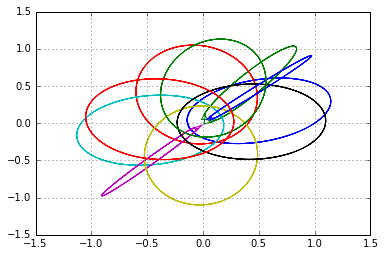

In [3]:
t=linspace(0,10,300)
for i in range(10):
    pto_inicial=(cos(i),sin(i),0.5,0.5) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t)
    plot(sol[:,0],sol[:,1])
    print "E=",energia(pto_inicial),"E_f=",energia(sol[-1])
grid(True)
show()

E= -0.7375 E_f= -0.737475415728
E= -0.7375 E_f= -0.737516147023
E= -0.7375 E_f= -0.737464306882
E= -0.7375 E_f= -0.737515233946
E= -0.7375 E_f= -0.737524800351
E= -0.7375 E_f= -0.737510044016
E= -0.7375 E_f= -0.737568349968
E= -0.7375 E_f= -0.737538263384
E= -0.7375 E_f= -0.737581753069
E= -0.7375 E_f= -0.73749676119


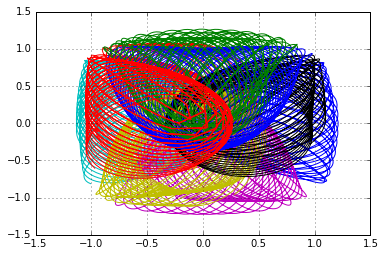

In [4]:
#Con una epsilon diferente, cambia la energia
t=arange(0,100,0.1)
eps=1.1
for i in range(10):
    pto_inicial=(cos(i),sin(i),0.5,0.5) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,))
    
    plot(sol[:,0],sol[:,1])
    print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
grid(True)
show()

E= -0.5 E_f= -0.500000228676
E= -0.5 E_f= -0.500000191396
E= -0.5 E_f= -0.500000436575
E= -0.5 E_f= -0.50000029132
E= -0.5 E_f= -0.500000099697
E= -0.5 E_f= -0.500000421741
E= -0.5 E_f= -0.50000019152
E= -0.5 E_f= -0.500000231316
E= -0.5 E_f= -0.500000287027
E= -0.5 E_f= -0.50000039225


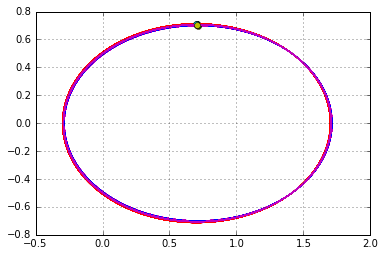

In [14]:
#Con una epsilon igual a 1
t=arange(0,100,0.0001)
eps=1.
for i in range(10):
    pto_inicial=cond_ini(pi/4,0.01) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    plot(sol[:,0],sol[:,1])
    plot(pto_inicial[0],pto_inicial[1],'o')
    print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
grid(True)
show()

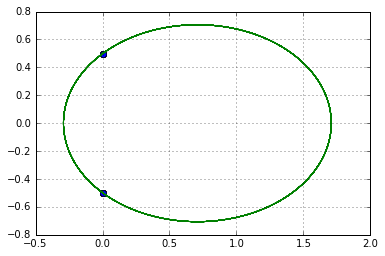

In [15]:
#para ver si hay raices
num=len(t) #numero de raices
raices=zeros(num) #se desea diez raices
puntos=zeros((num,4))
j=0
for i in range(len(t)-1): #longitud total, checar si en componente x hay cambio de signo, 
    #si hay entonces se obtiene la raiz de dicho punto, n-1 puntos
    if (sol[i][0]*sol[i+1][0])<0: #componente en cero, ver si hay raices
        raices[j],puntos[j]=root_trayec(ec_mov,sol[i],t[i])
        j+=1
raices,puntos=raices[0:j],puntos[0:j]
xlim([-0.5,2]),ylim([-0.8,0.8])
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])
grid(True)
#print "Se encuentran raices",raices,puntos

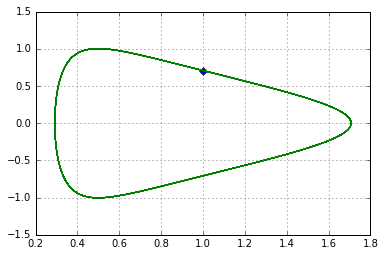

In [16]:
pr,r=p_rho(sol)
plot(r[0],pr[0],'D')
plot(r,pr)
grid(True)
show()

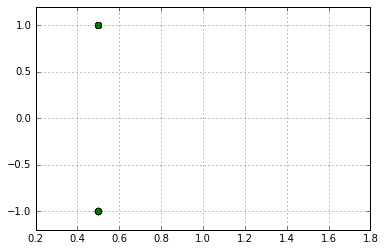

In [17]:
#raices en espacio fase
pr,r=p_rho(puntos)
xlim([0.2,1.8]),ylim([-1.2,1.2])
plot(r[0],pr[0],'D')
plot(r,pr,'o')
grid(True)
show()

### $\epsilon=1$, 
con esta epsilon y alrededor de $\alpha$ realizar el mapeo de Poincare

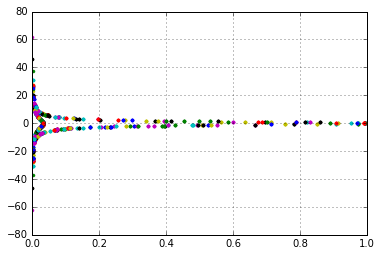

In [32]:
#Con una epsilon igual a 1
t=arange(0,10,0.0001)
N_trayectorias,eps,=200,1
for i in range(N_trayectorias):
    pto_inicial=cond_ini(pi/4,pi) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #plot(sol[:,0],sol[:,1])
    #plot(pto_inicial[0],pto_inicial[1],'o')
    #print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
    j=0
    num=len(t) #numero de raices
    raices=zeros(num) #se desea diez raices
    puntos=zeros((num,4))
    for k in range(len(t)-1): #longitud total, checar si en componente x hay cambio de signo, 
        if (sol[k][0]*sol[k+1][0])<0: #componente en cero, ver si hay raices
            raices[j],puntos[j]=root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos=raices[0:j],puntos[0:j]
    pr,r=p_rho(puntos)
    #xlim([0.2,1.8]),ylim([-1.5,1.5])
    #plot(r[0],pr[0],'D')
    plot(r,pr,'.')
grid(True)
show()
#Al acercarse las particulas adquieren un momento radial bastante grande, al tender a cero
#mostrar que para un sup de energia con variaciones en x e y, dejando fija la energia conetica, independiente de epsilon, el sistema
#si depende, mas no las condiciones. Para un conjunto de puntos que cumplen la misma condicion de energia todas ellas barren a la superficie.
#Cada punto representa una cpndicion inicial diferente

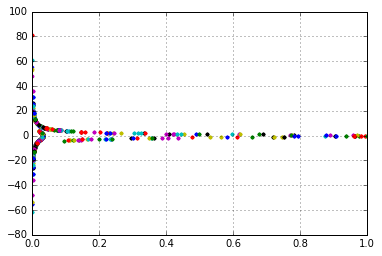

In [33]:
#Con una epsilon igual a 1
t=arange(0,10,0.00001)
N_trayectorias,eps,=200,1
for i in range(N_trayectorias):
    pto_inicial=cond_ini(pi/4,pi/2) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #plot(sol[:,0],sol[:,1])
    #plot(pto_inicial[0],pto_inicial[1],'o')
    #print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
    j=0
    num=len(t) #numero de raices
    raices=zeros(num) #se desea diez raices
    puntos=zeros((num,4))
    for k in range(len(t)-1): #longitud total, checar si en componente x hay cambio de signo, 
        if (sol[k][0]*sol[k+1][0])<0: #componente en cero, ver si hay raices
            raices[j],puntos[j]=root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos=raices[0:j],puntos[0:j]
    pr,r=p_rho(puntos)
    #xlim([0.2,1.8]),ylim([-1.5,1.5])
    #plot(r[0],pr[0],'D')
    plot(r,pr,'.')
grid(True)
show()
#Al acercarse las particulas adquieren un momento radial bastante grande, al tender a cero

/Users/Ismael/anaconda/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


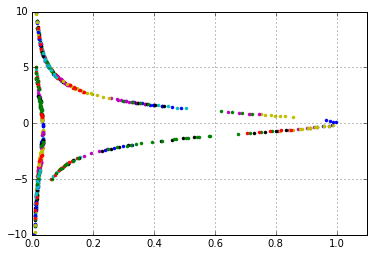

In [3]:
#Con una epsilon igual a 1.01
t=arange(0,10,0.00001)
N_trayectorias,eps,=100,1.01
for i in range(N_trayectorias):
    pto_inicial=cond_ini(pi/4,pi/2) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #plot(sol[:,0],sol[:,1])
    #plot(pto_inicial[0],pto_inicial[1],'o')
    #print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
    j=0
    num=len(t) #numero de raices
    raices=zeros(num) #se desea diez raices
    puntos=zeros((num,4))
    for k in range(len(t)-1): #longitud total, checar si en componente x hay cambio de signo, 
        if (sol[k][0]*sol[k+1][0])<0: #componente en cero, ver si hay raices
            raices[j],puntos[j]=root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos=raices[0:j],puntos[0:j]
    pr,r=p_rho(puntos)
    xlim([0,1.1]),ylim([-10,10])
    #plot(r[0],pr[0],'D')
    plot(r,pr,'.')
grid(True)
show()
#Al acercarse las particulas adquieren un momento radial bastante grande, al tender a cero

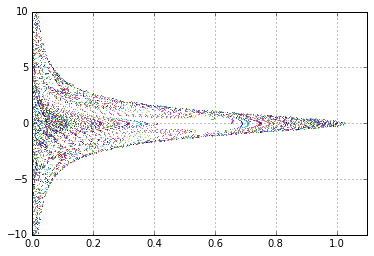

In [4]:
#Con una epsilon igual a 1.1
t=arange(0,100,0.0001)
N_trayectorias,eps,=100,1.1
for i in range(N_trayectorias):
    pto_inicial=cond_ini(pi/4,pi/2) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #plot(sol[:,0],sol[:,1])
    #plot(pto_inicial[0],pto_inicial[1],'o')
    #print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
    j=0
    num=len(t) #numero de raices
    raices=zeros(num) #se desea diez raices
    puntos=zeros((num,4))
    for k in range(len(t)-1): #longitud total, checar si en componente x hay cambio de signo, 
        if (sol[k][0]*sol[k+1][0])<0: #componente en cero, ver si hay raices
            raices[j],puntos[j]=root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos=raices[0:j],puntos[0:j]
    pr,r=p_rho(puntos)
    xlim([0,1.1]),ylim([-10,10])
    #plot(r[0],pr[0],'D')
    plot(r,pr,'.',markersize=0.7)
grid(True)
show()
#Al acercarse las particulas adquieren un momento radial bastante grande, al tender a cero

E= -0.5 E_f= -0.500000963968
E= -0.5 E_f= -0.50000113092
E= -0.5 E_f= -0.500002798878
E= -0.5 E_f= -0.500001478739
E= -0.5 E_f= -0.500000907028
E= -0.5 E_f= -0.500001186415
E= -0.5 E_f= -0.500000675867
E= -0.5 E_f= -0.500001672867
E= -0.5 E_f= -0.500001111386
E= -0.5 E_f= -0.500000416023


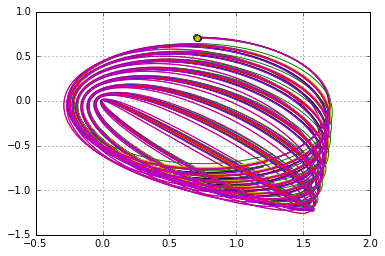

In [10]:
#Con una epsilon diferente, cambia la energia
t=arange(0,100,0.0001)
eps=1.1
for i in range(10):
    pto_inicial=cond_ini(pi/4,0.01) #cuatro condiciones, velocidad negativa en epsilon=1->trayectorias cerradas
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    plot(sol[:,0],sol[:,1])
    plot(pto_inicial[0],pto_inicial[1],'o')
    print "E=",energia(pto_inicial,eps),"E_f=",energia(sol[-1],eps)
grid(True)
show()

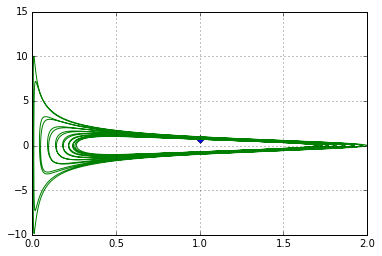

In [11]:
pr,r=p_rho(sol)
plot(r[0],pr[0],'D')
plot(r,pr)
grid(True)
show()

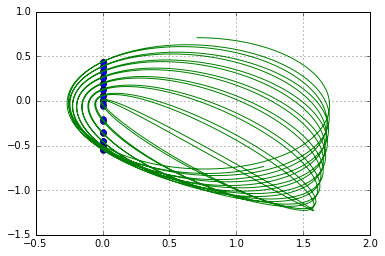

In [12]:
#para ver si hay raices
num=len(t) #numero de raices
raices=zeros(num) #se desea diez raices
puntos=zeros((num,4))
j=0
for i in range(len(t)-1): #longitud total, checar si en componente x hay cambio de signo, 
    #si hay entonces se obtiene la raiz de dicho punto, n-1 puntos
    if (sol[i][0]*sol[i+1][0])<0: #componente en cero, ver si hay raices
        raices[j],puntos[j]=root_trayec(ec_mov,sol[i],t[i])
        j+=1
raices,puntos=raices[0:j],puntos[0:j]
xlim([-0.5,2]),ylim([-1.5,1])
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])
grid(True)
#print "Se encuentran raices",raices,puntos

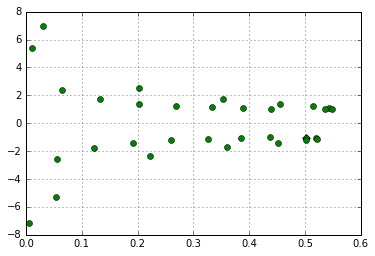

In [13]:
#raices en espacio fase
pr,r=p_rho(puntos)
plot(r[0],pr[0],'D')
plot(r,pr,'o')
grid(True)
show()